In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import scipy.stats as stats
plt.rcParams["figure.figsize"] = (10,7)
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [5]:
df.shape

(200, 4)

In [6]:
df.info() # null değer yok.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe # std nin mean den büyük olduğu yerlerde outlier ihtimali var. 
# yani bu durumda outlier değer görünmüyor datada

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


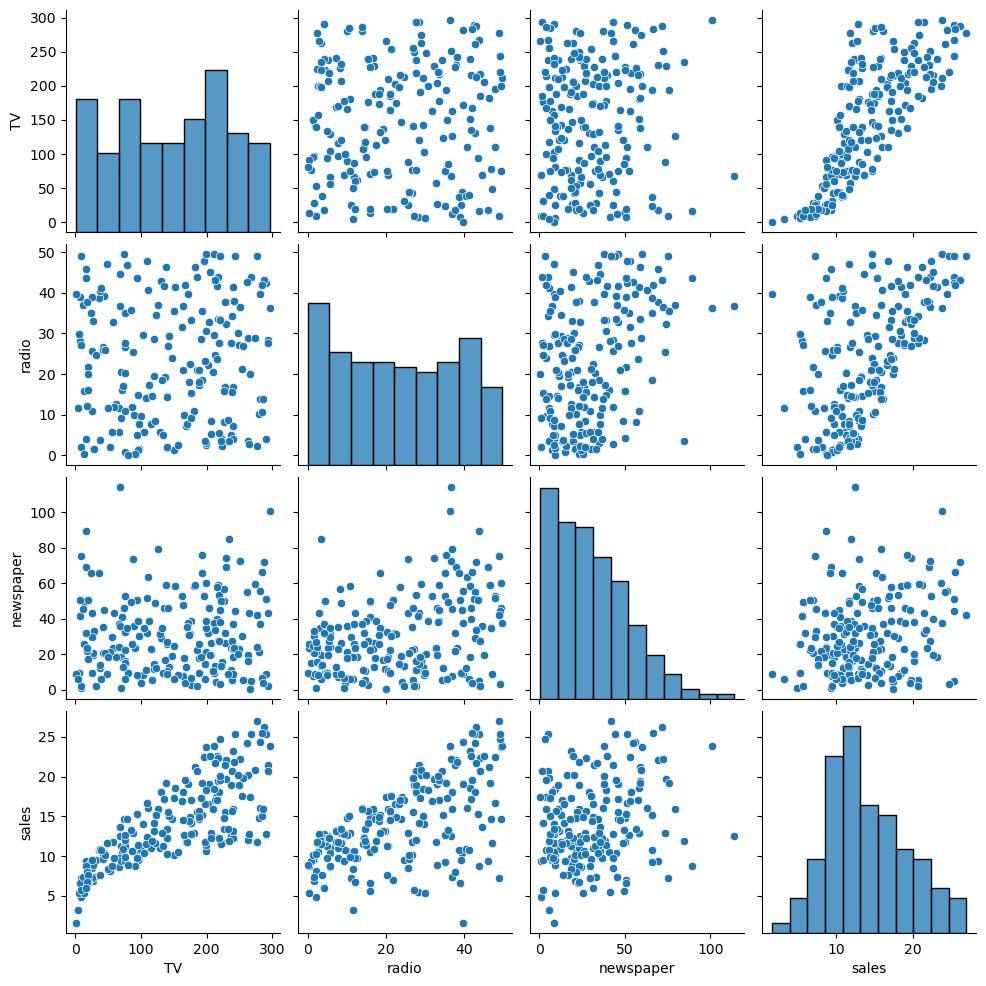

In [8]:
sns.pairplot(df) # boxplot da kullanılabilir.
plt.show();# sales ile tv arasında corr yüksek.

In [9]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


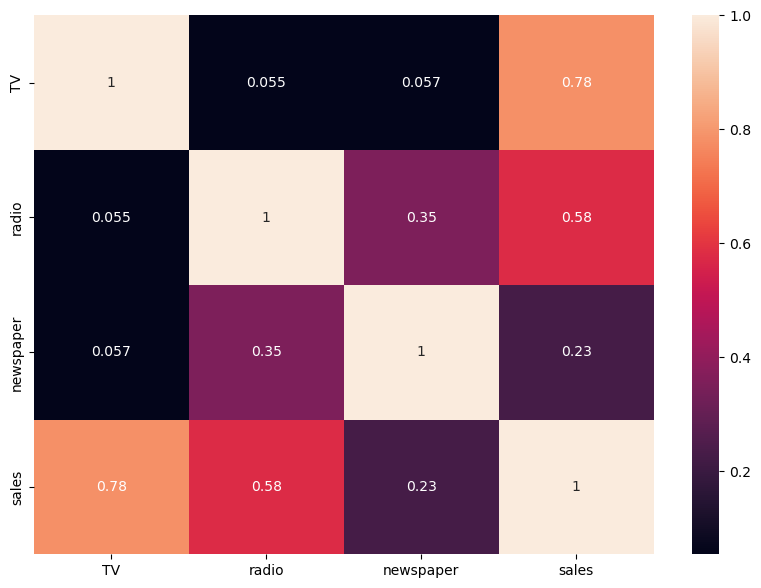

In [10]:
sns.heatmap(df.corr(), annot = True)
plt.show();
#corr en yüksek tv ; diğer radio ve newspaper düşük onlar da yüksek olsaydı score lar daha iyi olurdu.(lin reg için)

### TRAİN TEST SPLİT

In [ ]:
#pip install scikit-learn anaconda kullanmayanlar için

In [11]:
X = df.drop(columns = "sales") #df[["TV", "radio", "newspaper"]]
y = df["sales"] 

In [14]:
from sklearn.model_selection import train_test_split
#modeli eğittikten sonra predict etmek için datayı yukardaki fonk ile train test setlerine bölüyoruz.

In [16]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 
# default olarak test_size = 0.25 tir. best practise 0.2,0.25,0.30 dur.
# burdaki amacımız train setine daha fazla veri sağlamak. Özellikle küçük datalarda 0.1, 0.15 seçilebilir.   

In [17]:
df.sample(15)

,TV,radio,newspaper,sales
67,139.3,14.5,10.2,13.4
32,97.2,1.5,30.0,9.6
196,94.2,4.9,8.1,9.7
95,163.3,31.6,52.9,16.9
38,43.1,26.7,35.1,10.1
154,187.8,21.1,9.5,15.6
13,97.5,7.6,7.2,9.7
83,68.4,44.5,35.6,13.6
132,8.4,27.2,2.1,5.7
8,8.6,2.1,1.0,4.8


In [18]:
print("train features shape:",X_train.shape)
print("train target shape :", y_train.shape)
print("test features shape:", X_test.shape)
print("test target shape:", y_test.shape)

train features shape: (160, 3)
train target shape : (160,)
test features shape: (40, 3)
test target shape: (40,)


In [19]:
X_train

,TV,radio,newspaper
79,116.0,7.7,23.1
197,177.0,9.3,6.4
38,43.1,26.7,35.1
24,62.3,12.6,18.3
122,224.0,2.4,15.6
...,...,...,...
106,25.0,11.0,29.7
14,204.1,32.9,46.0
92,217.7,33.5,59.0
179,165.6,10.0,17.6


In [21]:
X_test

,TV,radio,newspaper
95,163.3,31.6,52.9
15,195.4,47.7,52.9
30,292.9,28.3,43.2
158,11.7,36.9,45.2
128,220.3,49.0,3.2
115,75.1,35.0,52.7
69,216.8,43.9,27.2
170,50.0,11.6,18.4
174,222.4,3.4,13.1
45,175.1,22.5,31.5


In [20]:
y_train

79     11.0
197    12.8
38     10.1
24      9.7
122    11.6
       ... 
106     7.2
14     19.0
92     19.4
179    12.6
102    14.8
Name: sales, Length: 160, dtype: float64

In [22]:
y_test

95     16.9
15     22.4
30     21.4
158     7.3
128    24.7
115    12.6
69     22.3
170     8.4
174    11.5
45     14.9
66      9.5
182     8.7
165    11.9
78      5.3
186    10.3
177    11.7
56      5.5
152    16.6
82     11.3
68     18.9
124    19.7
16     12.5
148    10.9
93     22.2
65      9.3
60      8.1
84     21.7
67     13.4
125    10.6
132     5.7
9      10.6
18     11.3
55     23.7
75      8.7
150    16.1
104    20.7
135    11.6
137    20.8
164    11.9
76      6.9
Name: sales, dtype: float64

### MODEL FİTTİNG AND COMPARE ACTUAL AND PREDİCTED LABELS

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression()
# her daim değişkene atıyoruz, aksi halde predict ederken hata alırız.

In [25]:
model.fit(X_train, y_train)# fit yapıyorum yani train datamı kullanıyorum
#burda model yerine  LinearRegression() yazılır kod çalışır. Ancak aşağıdaki hücrede prediction alırken 
#LinearRegression() kullanılırsa hata verir. Hatanın önüne geçmek için model = LinearRegression() ataması yapılmalı.

LinearRegression()

In [26]:
y_pred = model.predict(X_test) #model yerine LinearRegression() yazılırsa hata aldığımızı görürüz.
y_pred

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [28]:
X_train.head(1)

,TV,radio,newspaper
79,116.0,7.7,23.1


In [29]:
model.coef_
#katsayıların(coef) sıralaması (slope ı verir.)
#katsayıları feature ların tahmin üzerindeki etkisini görmek ve feature selection için kullanılıyor.

array([0.04472952, 0.18919505, 0.00276111])

In [30]:
model.intercept_ # intercept kalan kısım yani burda 3 tane feture var  y= a1.x1 +a2.x2 +a3.x3 +b 
# a da katsayı ya da slope da diyebilirim.
# b burada intercept oluyor

2.979067338122629

In [31]:
#manuel çıktı alıyorum şu an model nasıl predict ediyor merak ettiğim için
X_test.loc[[95]]

,TV,radio,newspaper
95,163.3,31.6,52.9


In [33]:
y_test.loc[95]

16.9

In [34]:
model.predict(X_test.loc[[95]]) # yukarda gerçek değerim ;16.9, iken predict değerim; 16.4 0.5 lik hata değerim var

array([16.4080242])

In [35]:
my_dict = {"Actual": y_test,"Pred": y_pred,"Residual":y_test-y_pred,"LSE":(y_test-y_pred)**2,"ABS": abs(y_test-y_pred)}

In [36]:
comparing = pd.DataFrame(my_dict)
comparing
#simple lin reg. da bahsedildiği gibi LSE ve ABS üzerinden nasıl hesaplandığını inceleceğim.

,Actual,Pred,Residual,LSE,ABS
95,16.9,16.408024,0.491976,0.242040,0.491976
15,22.4,20.889882,1.510118,2.280456,1.510118
30,21.4,21.553843,-0.153843,0.023668,0.153843
158,7.3,10.608503,-3.308503,10.946189,3.308503
128,24.7,22.112373,2.587627,6.695812,2.587627
115,12.6,13.105592,-0.505592,0.255623,0.505592
69,22.3,21.057192,1.242808,1.544572,1.242808
170,8.4,7.461010,0.938990,0.881702,0.938990
174,11.5,13.606346,-2.106346,4.436693,2.106346
45,14.9,15.155070,-0.255070,0.065061,0.255070


In [38]:
result_sample = comparing.iloc[:,:3]
result_sample # actual,pred, residual u görselleştimek için ilk 3 feature  ı aldım.

,Actual,Pred,Residual
95,16.9,16.408024,0.491976
15,22.4,20.889882,1.510118
30,21.4,21.553843,-0.153843
158,7.3,10.608503,-3.308503
128,24.7,22.112373,2.587627
115,12.6,13.105592,-0.505592
69,22.3,21.057192,1.242808
170,8.4,7.461010,0.938990
174,11.5,13.606346,-2.106346
45,14.9,15.155070,-0.255070


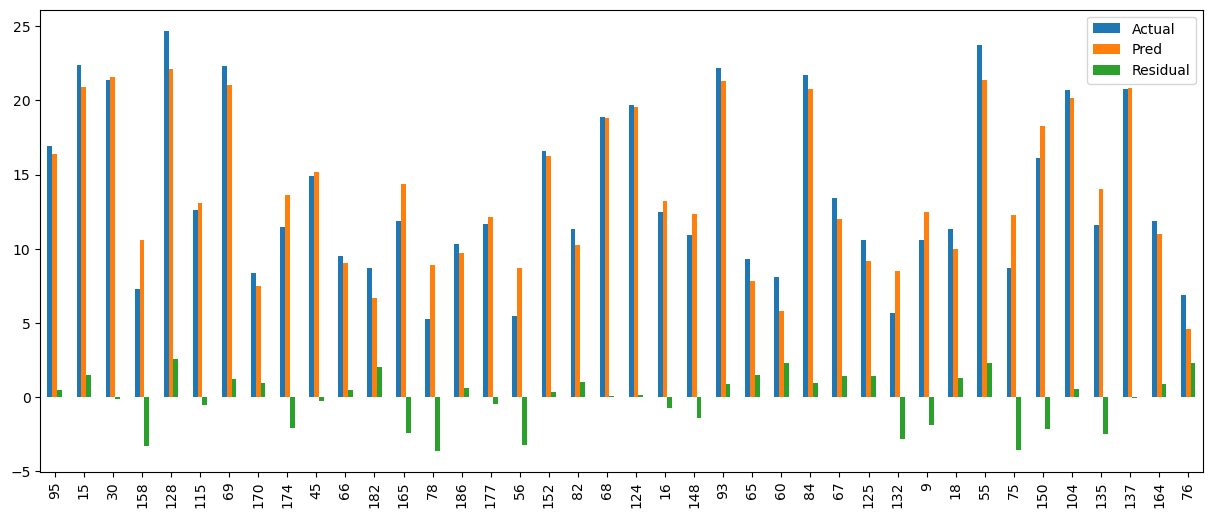

In [39]:
result_sample.plot(kind="bar",figsize = (15,6))
plt.show();

### ERROR METRİCS

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [42]:
R2_score = r2_score(y_test,y_pred)
R2_score
#R2_score da feature lar ile targettaki değişimin ne kadarını açıklayabilidiğimi gösteriyor.
#ya da target ı doğru tahmin etmek için gerekli olan bilgilerin ne kadarına sahip olduğumu gösterir.

0.8994380241009119

In [44]:
mae = mean_absolute_error(y_test,y_pred) # comparing.ABS.sum()/X_test.shape[0]
mae
#residual ların mutlak değer toplamının gözlem sayısına bölünmesi modelin yaptığı ort. mutlak hata(mae) tespit eder.
#yapılan kötü tahminleri cezalandırmadığından tercih edilmez.

1.4607567168117603

In [45]:
X_test.shape

(40, 3)

In [46]:
mse = mean_squared_error(y_test,y_pred) #comparing.LSE.sum()/X_test.shape[0]
mse
# residual ların karesi toplamını gözlem sayısına bölünür. ort. kare hatayı(mse) tespit eder.
#yapılan kötü tahminleri cezalandırır fakat target biriminin karesi olduğundan yorumlanması zor.
#bundan ötürü tercih edilmez

3.174097353976106

In [48]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))# (comparing.LSE.sum()/X_test.shape[0])**0.5
rmse
#residual lerin karesinin toplamını gözlem sayısına bölünmesi, modelin yaptığı ort kare hatayı(rmse) tespit eder
#mse nin karekökü alınarak error metriği target ile aynı birime dönüştürülür
#rmse kötü tahminleri chem cezalandırır hem de target ile aynı birim olduğundan yorumlanması daha kolay olur.
#en çok tercih edilen metriktir.

1.7815996615334506

In [49]:
sales_mean = df["sales"].mean()
sales_mean # metrikleri yorumlamak için target ın ort alıyoruz.

14.022500000000003

In [50]:
mae/sales_mean#modelden aldığımız predict lerin genel performansını değerlendiriyoruz. mae ye göre %10 hata yaptı.

0.10417234564533857

In [52]:
rmse/sales_mean # rmse metriğine göre yaklaşık %13 hata yaptı.burda kötü tahminlerde cezalandırma da olduğu için rmse
# yi tercih ediyorum.

0.127052926477693

### ADJUSTED R2 SCORE(DÜZENLENMİŞ)
GET DUMMİES yaptığımda yani 3 feature varken örneğin 10 daha ekleyerek get dummies yaptığımızda 13 tane feature olur ve bu da R2 yüksek çıkması demektir feature lar anlamlı ya da anlamsız olsun değişmez.Özetle row değil de feature sadece artarsa R2 score u artar. bunun için ADJUSTED R2 score u ile kontrol edeceğiz.
#en boy un sabit kalamsı lazım aslında

In [64]:
def adj_r2(y_test,y_pred,X):
    r2=r2_score(y_test,y_pred)
    n=X.shape[0] #number of observation row
    p=X.shape[0]#number of independent variables
    adj_r2 =1-(1-r2)*(n-1)/(n-p-1)
    return adj_r2
# Feature sayısı row sayısısna göre çok fazla olan datalarda düzeltilmiş R2_score bakmam lazım.Bu tür datalarda 
#r2_score da yalancı bir iyileştirme yapar bu scikit learn library sinde bulunmadığından manuel olarak fonk oluşturdum.
# feature ve row arasındaki trade off a göre r2_score belirliyor.feature sayısına göre row az kalırsa r2_score nda 
#yalancı bir artış olur.

In [65]:
X.shape

(200, 3)

In [66]:
adj_r2(y_test,y_pred,X)

21.011833203918535

### EXAM :WHAT İS THE CONCEPT OF PUNİSHMENT FOR RMSE ERROR METRİCS?

In [68]:
variables2 = {"actual":[1000, 2000, 3000,4000,5000], "pred":[1100,2200,3200,4200,5300]}
# rsme in cezalandırmasına örnek mae ye ve rmse ye bakıyorum.

In [69]:
df_2 = pd.DataFrame(variables2)
df_2

,actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,5300


In [70]:
#mae
y_test2 = df_2.actual
y_pred2 = df_2.pred

mean_absolute_error(y_test2,y_pred2)

200.0

In [71]:
#rmse
np.sqrt(mean_squared_error(y_test2,y_pred2))
#tahmin ile gerçek değer yakın olunca nispeten mae ile rmse yakın oluyor birbirine

209.76176963403032

In [72]:
variables3 = {"actual":[1000,2000,3000,4000,5000],"pred":[1100,2200,3200,4200,6000]} # 5300 yerine 6000 ini getirdim.

In [73]:
df_3 = pd.DataFrame(variables3)
df_3

,actual,pred
0,1000,1100
1,2000,2200
2,3000,3200
3,4000,4200
4,5000,6000


In [76]:
#mae
y_test3 = df_3.actual
y_pred3 = df_3.pred

mean_absolute_error(y_test3,y_pred3)

340.0

In [78]:
#rmse
np.sqrt(mean_squared_error(y_test3,y_pred3))
#datada kötü tahmin varsa mae ve rmse metrics aralarında fark açılıyor. ne kadar yakınsa kötü tahminler olmadığına 
#dair insight lear elde ederiz. Fakat fark fazlaysa modelde kötü tahminleri var demek. Datayı detaylı incelemek gerek. 

475.3945729601885

### EVALUATION MODEL

In [86]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
def train_val(y_train,y_train_pred,y_test,y_pred, model_name):
    
    scores = {model_name+"_train":{"R2":r2_score(y_train,y_train_pred),
    "mae": mean_absolute_error(y_train,y_train_pred),
    "mse":mean_squared_error(y_train,y_train_pred),
    "rmse":np.sqrt(mean_squared_error(y_train,y_train_pred))}},
    
    
    scores = {model_name+"_test":{"R2":r2_score(y_test,y_pred),
    "mae":mean_absolute_error(y_test,y_pred),
    "mse":mean_squared_error(y_test,y_pred),
    "rmse":np.sqrt(mean_squared_error(y_test,y_pred))}}
    
    return pd.DataFrame(scores)
#tüm reg metrics bir arada görmek için yukardaki fonk tanımlıyorum.

In [91]:
ls=train_val(y_train, y_train_pred, y_test,y_pred,"linear")
ls
#önce test setinin metric leri alınır
#sonra train setinden metric ler de alınarak modeln hiç görmediği data üzerinden aldığı scorlar ile eğitim datasında 
#aldığı scorları karşılaştırıyoruz.scorlar birbirine yakınsa model genellenebilir demektir.
#ciddi fark varsa model genelelemez demektir.

,linear_test
R2,0.899438
mae,1.460757
mse,3.174097
rmse,1.781600


## Lineer reg için normal dağılım ve residual e bakıyoruz ve random olması gerekiyor.

In [92]:
residuals = y_test-y_pred # linear reg uyumlu olduğunu anlamak için öncelikle bazı assumptionların kontrolü için 
#test datasındaki residual ları hesaplıyorum.

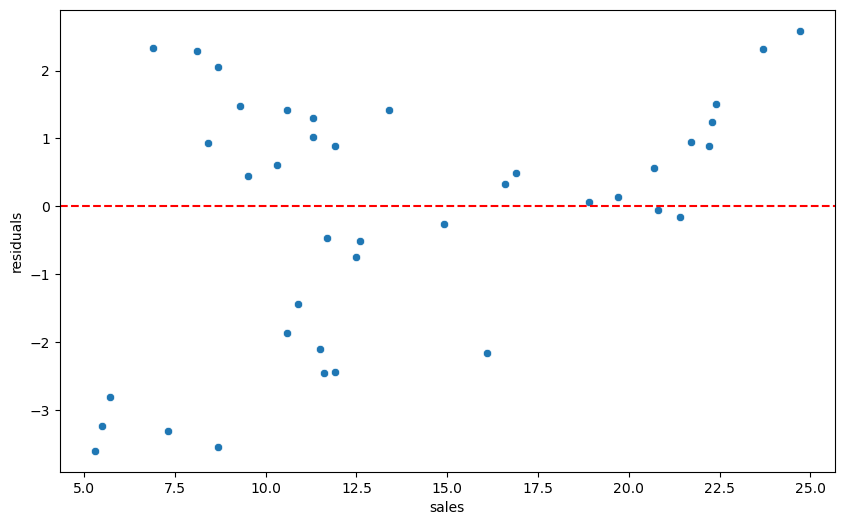

In [93]:
plt.figure(figsize = (10,6))
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0,color="r",linestyle = "--")
plt.ylabel("residuals")
plt.show();

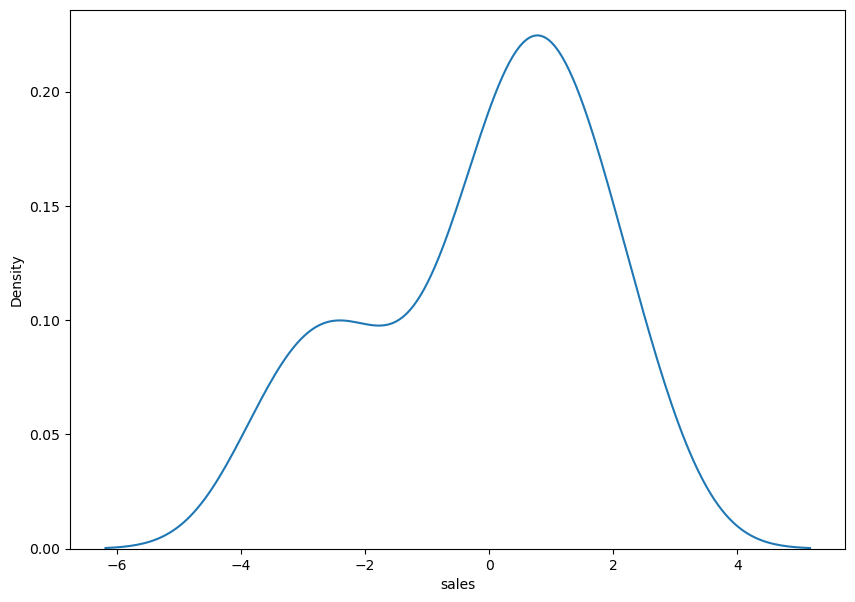

In [95]:
sns.kdeplot(residuals)
plt.show();
#normal dağılıma uygun olup olmadığını görmek için

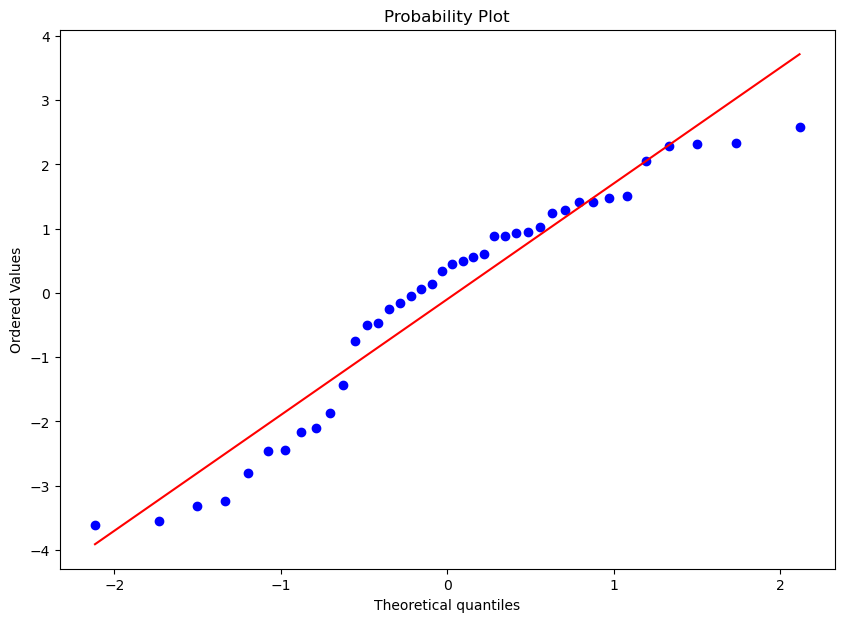

In [96]:
stats.probplot(residuals, dist = "norm",plot = plt)
plt.show();
#yukardakinden anlamadım diyorsak bununla da inceleyebiliriz.

In [97]:
from scipy.stats import skew
skew(residuals) #skew değerleri üzerinden yorum yapılabilir.skew değeri -0.5 ile +0.5 ise normal dağılıma çok uygun
#-1 ile 1 arasında ise yavaş yavaş normal dağılımın bozulmaya başladığı söylenebilir.

-0.5399061927739808

In [105]:
#conda olmayanlar için; 
#pip install yellowbrick
#conda olanlar için;
#conda install -c conda-forge yellowbrick(terminalde)
import yellowbrick
print(yellowbrick.__version__)

1.5


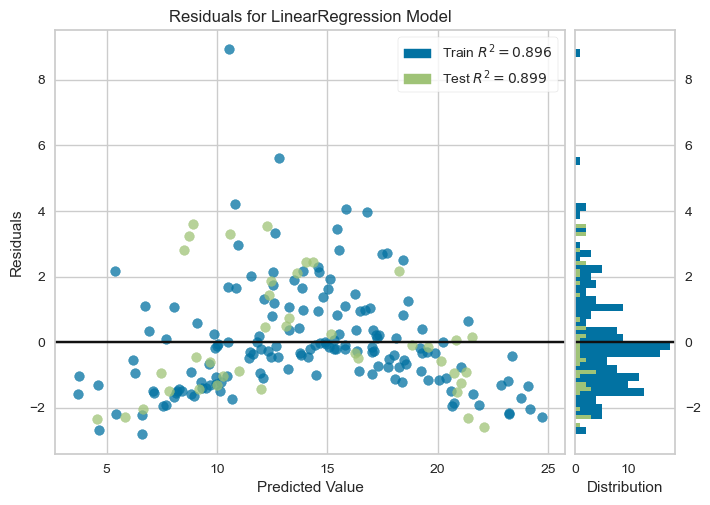

In [107]:
from yellowbrick.regressor import ResidualsPlot
# ınstantiate the linear model and visualizer
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show();
#ML görselleştirmede sıklıkla tercih edilen library. Residual ları hem tes hem train seti için bakabiliyorum.

### predict error for linear reg

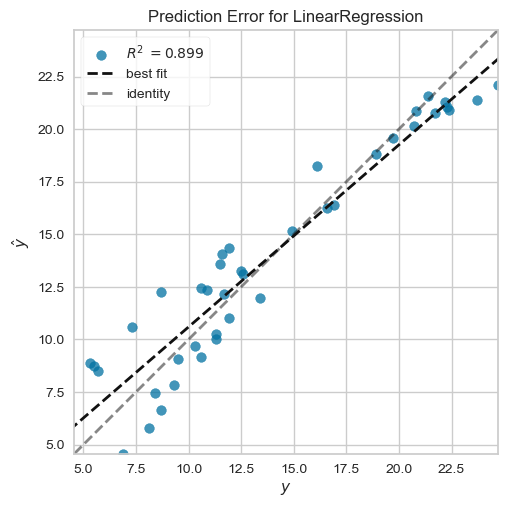

In [108]:
from yellowbrick.regressor import PredictionError
# ınstantiate the linear model and visualizer
model = LinearRegression()
visualizer = PredictionError(model)

visualizer.fit(X_train,y_train)
visualizer.score(X_test,y_test)
visualizer.show();
#y ekseni prediction, x ekseni gerçek değerler yer alır. gri çizgi modelin tahminlerinin mekemmel olduğu noktaları,
#siyah çizgi ise modelin eğitim sonrası çzidiği best fit line  temsil eder.
#gri ve siyah çizgi ne kadar yakınsa model tahmini o kadar iyi demektir.

### retraining model on full data

In [111]:
final_model = LinearRegression() # eğitim tamamlanıp metric leri de kontrol ettikten sonra model genelleme yaptığından
#emin olup ardından final modeli oluşturabiliriz.

In [112]:
final_model.fit(X,y) # modelimizi tüm data ile eğitiyoruz.

LinearRegression()

### coeficients

In [113]:
final_model.coef_ # eğitim sonrası elde etttiğimiz katsayılar üzerinden feature ların target üzerinde ne kadar
#etkisi olduğuna dair yorumları bu katsayılar üzerinden yapacağız.
#örneğin tv feature ındaki 1 birimlik artış targette tv katsayısı(.04576465) kadar artış yaparken 
#radyo feature 'indaki 1 brimlik artış targetta radyo katsayısı (-0.00103749) kadar azalış yapar.
#katsayıların büyüklüğüne göre hangi feature ın model için önemli olduğuna karar veririz.

array([ 0.04576465,  0.18853002, -0.00103749])

In [114]:
final_model.intercept_

2.9388893694594085

In [115]:
X.head()#katsayı sıralaması X deki feature  sıralamasıyla aynı

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [116]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [118]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000
